In [70]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

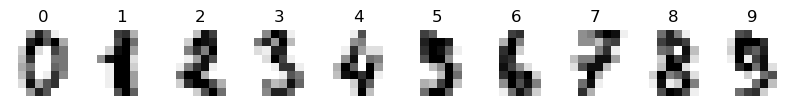

In [71]:
dataset = datasets.load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(label)

Converts 8x8 to 64x1

In [77]:
data = dataset.images.reshape((len(dataset.images), -1))
#data2 = dataset.images
#print(np.shape(data2))
print(np.shape(data))

(1797, 64)


In [146]:
classifier = svm.SVC(gamma=0.006)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, test_size = 0.5)

In [148]:
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

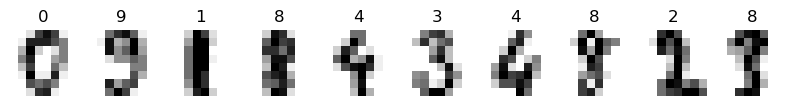

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(prediction)

In [150]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        81
           1       1.00      0.87      0.93        94
           2       1.00      0.97      0.98        95
           3       1.00      0.81      0.89        98
           4       1.00      0.91      0.96        94
           5       1.00      0.90      0.95       101
           6       1.00      0.94      0.97        84
           7       1.00      0.96      0.98        83
           8       0.54      1.00      0.70        87
           9       0.93      0.91      0.92        82

    accuracy                           0.91       899
   macro avg       0.95      0.91      0.92       899
weighted avg       0.95      0.91      0.92       899



Gamma = 0,001 
test_size = 0,7
Accuracy = macro_avg = weighted_avg = 0,98

Gamma = 0,001
test_size = 0,5
Accuracy = macro_avg = weighted_avg = 0,99

Gamma = 0,01
test_size = 0,7
Accuracy, macro_avg, weighted_avg = 0.53, 0.59, 0.58 
worst results:
    5 - lowest recall = 0,11; f1-score = 0,20
    8 - lowset precision = 0,17 (all other are 1); f1-score = 0,29 (propablly, it gives 8 whenever it is not sure what to do, and 5 is similar)
    
Gamma = 0,01
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.53, 0.59, 0.58 
results very similar to test above

Gamma = 0, 005
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.96, 0.97, 0.97
1, 3, 8 don't have 1 precision (8 worst)
9 have worst recall (0,89)

Gamma = 0,006
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.91, 0.92, 0.92


In [114]:
import seaborn as sns

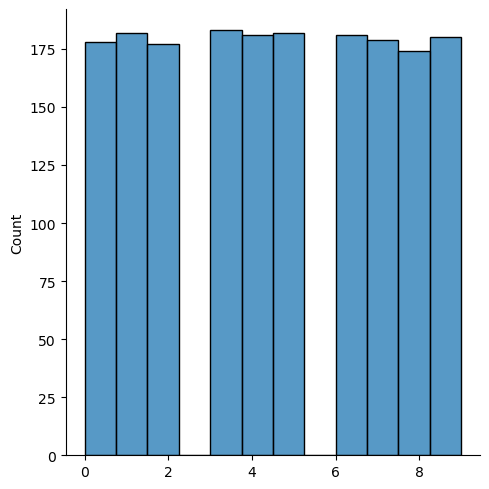

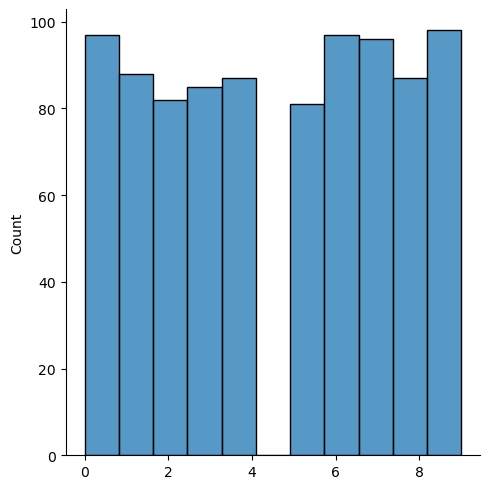

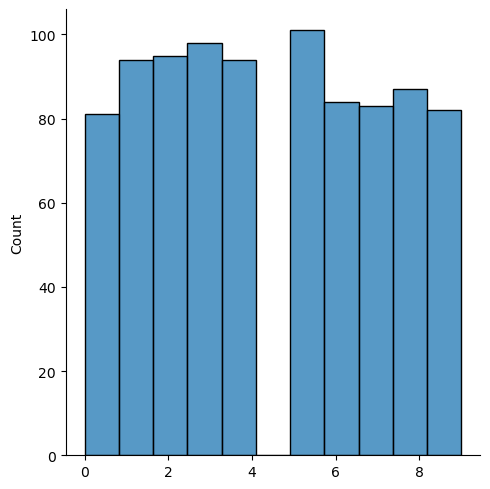

In [151]:
#to-do: fix those (delete these blank columns)
sns.displot(dataset.target)
sns.displot(y_train)
sns.displot(y_test)

plt.show()